<h1> K-means with 6D standardized data

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_feat_scaled = pd.read_csv("../data/processed/scaled_customer_features.csv")
df_feat_scaled.head(3)

,Customer ID,Recency_scaled,Frequency_scaled,Monetary_scaled,AvgUnitPrice_scaled,UniqueItems_scaled,AvgQuantPerOrder_scaled
0,12346.0,2.334858,-0.424675,8.359634,-0.100146,-0.708687,60.891574
1,12347.0,-0.905199,0.354080,0.251046,-0.053249,0.486336,-0.028273
2,12348.0,-0.175186,-0.035297,-0.028547,0.037994,-0.462653,0.022638


In [4]:
feature_cols = ['Recency_scaled','Frequency_scaled','Monetary_scaled','AvgUnitPrice_scaled','UniqueItems_scaled','AvgQuantPerOrder_scaled']
X_feat_scaled = df_feat_scaled[feature_cols].values
K_range = range(2, 11)

In [5]:
sil_score = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_feat_scaled)
    score = silhouette_score(X_feat_scaled, labels)
    sil_score.append(score)
print(sil_score)

[0.4458802835717644, 0.47026644965573444, 0.4655942617472153, 0.4660760573515918, 0.4658693553754538, 0.5103669508561414, 0.4695396541234798, 0.5022146860640287, 0.3992942198072263]


In [6]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=50)
labels = kmeans.fit_predict(X_feat_scaled) + 1
df_feat_scaled['cluster'] = labels

In [7]:
df_feat_scaled.head(3)

,Customer ID,Recency_scaled,Frequency_scaled,Monetary_scaled,AvgUnitPrice_scaled,UniqueItems_scaled,AvgQuantPerOrder_scaled,cluster
0,12346.0,2.334858,-0.424675,8.359634,-0.100146,-0.708687,60.891574,3
1,12347.0,-0.905199,0.354080,0.251046,-0.053249,0.486336,-0.028273,1
2,12348.0,-0.175186,-0.035297,-0.028547,0.037994,-0.462653,0.022638,1


In [8]:
df_feat_scaled["cluster"].value_counts()

cluster
1    3181
2    1140
3      18
Name: count, dtype: int64

In [9]:
stats = df_feat_scaled.groupby("cluster")[feature_cols].agg(
    ["mean", "median", "std", "min", "max"]
).round(3)

In [10]:
stats["Recency_scaled"]

,mean,median,std,min,max
cluster,,,,,
1,-0.527,-0.635,0.339,-0.915,0.875
2,1.482,1.445,0.705,-0.455,2.815
3,-0.681,-0.895,0.759,-0.915,2.335


In [11]:
stats["Frequency_scaled"]

,mean,median,std,min,max
cluster,,,,,
1,0.077,-0.165,0.749,-0.425,10.608
2,-0.352,-0.425,0.183,-0.425,3.858
3,8.675,6.909,7.679,-0.425,26.702


In [12]:
stats["Monetary_scaled"]

,mean,median,std,min,max
cluster,,,,,
1,-0.006,-0.123,0.430,-0.229,7.188
2,-0.167,-0.194,0.208,-0.228,4.727
3,11.680,8.573,8.453,1.124,30.950


In [13]:
stats["AvgUnitPrice_scaled"]

,mean,median,std,min,max
cluster,,,,,
1,-0.034,-0.047,0.117,-0.131,3.086
2,0.095,-0.036,1.939,-0.126,59.311
3,0.009,-0.052,0.231,-0.100,0.923


In [14]:
stats["UniqueItems_scaled"]

,mean,median,std,min,max
cluster,,,,,
1,0.119,-0.158,0.866,-0.709,7.692
2,-0.443,-0.521,0.273,-0.709,1.131
3,7.027,6.327,6.483,-0.709,20.216


In [15]:
stats["AvgQuantPerOrder_scaled"]

,mean,median,std,min,max
cluster,,,,,
1,-0.021,-0.031,0.191,-0.039,10.256
2,-0.015,-0.032,0.147,-0.039,3.491
3,4.625,0.005,14.975,-0.037,60.892


<h3>Visualized each cluster

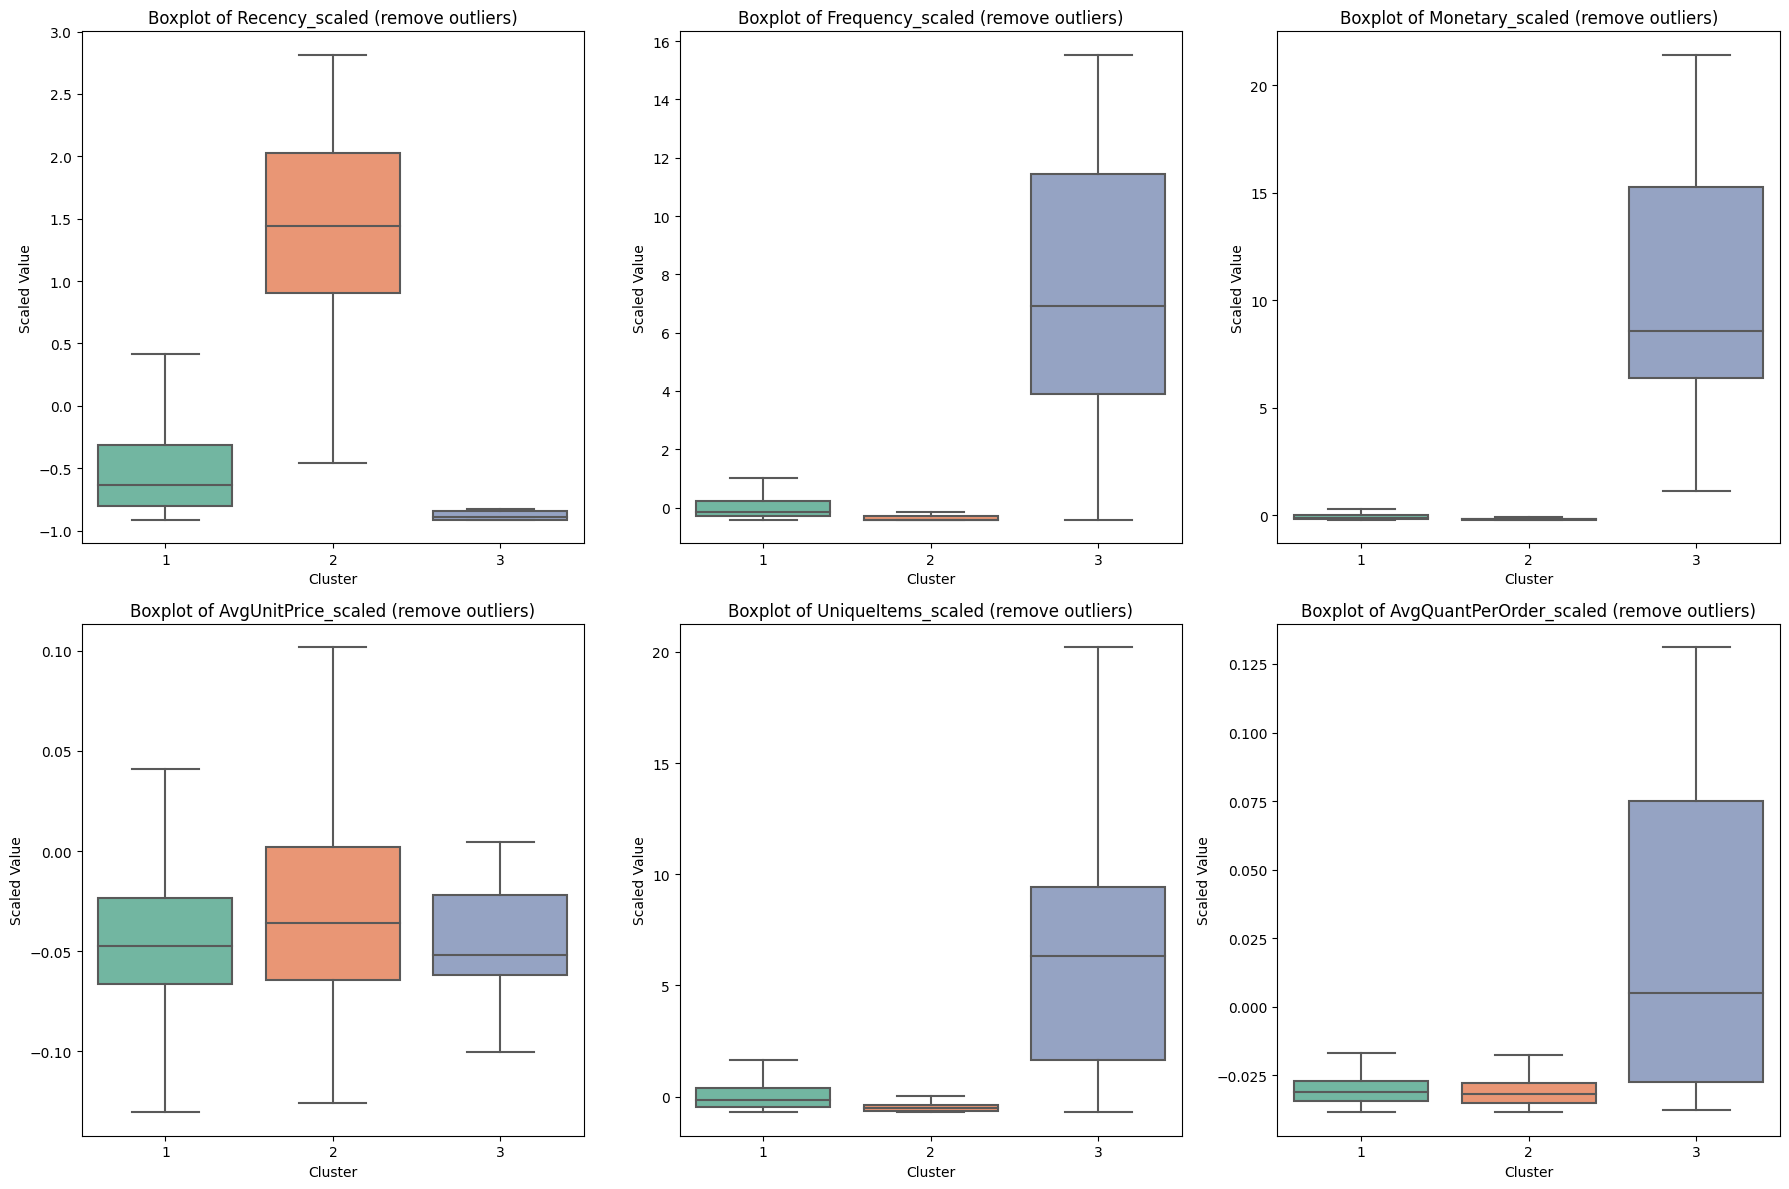

In [18]:
feature_cols = [
    'Recency_scaled',
    'Frequency_scaled',
    'Monetary_scaled',
    'AvgUnitPrice_scaled',
    'UniqueItems_scaled',
    'AvgQuantPerOrder_scaled'
]

plt.figure(figsize=(18, 12))

for i, col in enumerate(feature_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='cluster', y=col, data=df_feat_scaled, palette='Set2', showfliers=False)
    plt.title(f'Boxplot of {col} (remove outliers)')
    plt.xlabel('Cluster')
    plt.ylabel('Scaled Value')

plt.tight_layout()
plt.show()

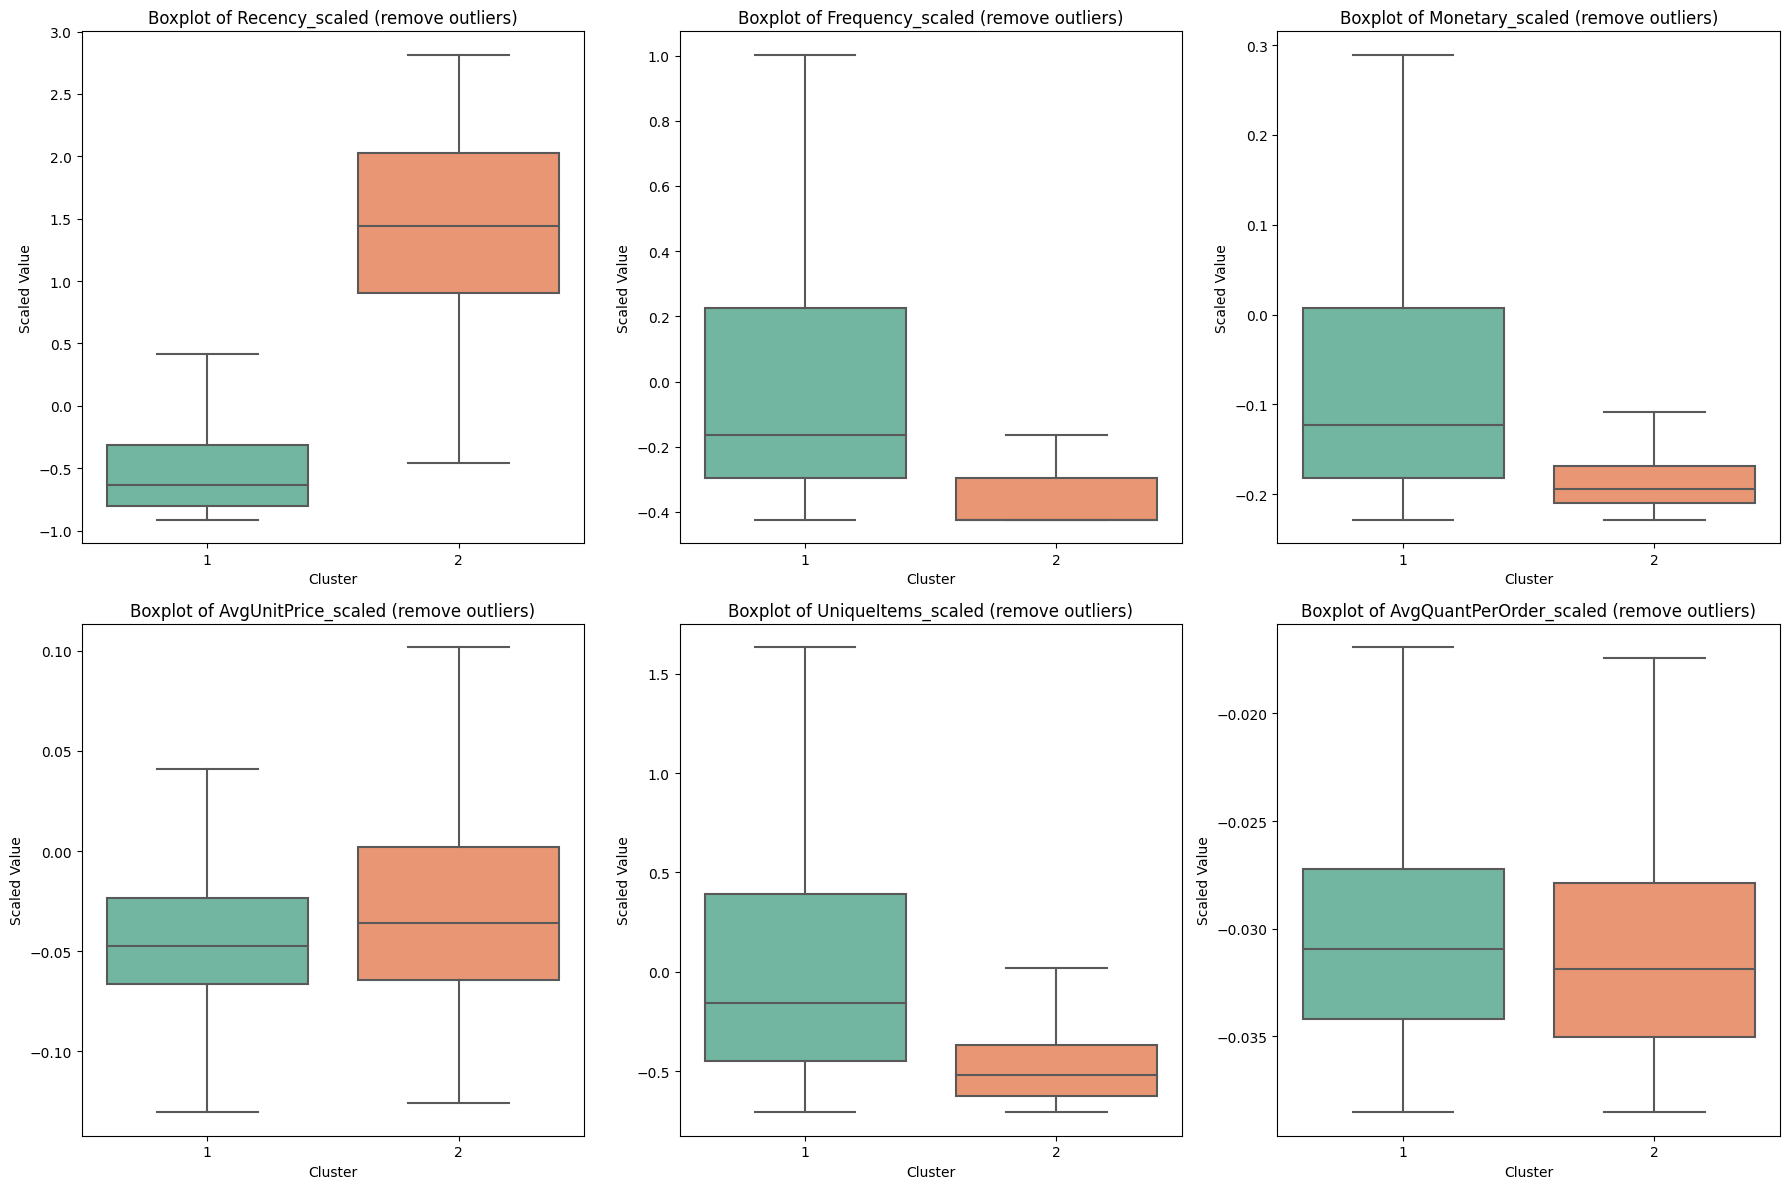

In [19]:
df_filtered = df_feat_scaled[df_feat_scaled['cluster'].isin([1, 2])]
plt.figure(figsize=(18, 12))

for i, col in enumerate(feature_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='cluster', y=col, data=df_filtered, palette='Set2', showfliers=False)
    plt.title(f'Boxplot of {col} (remove outliers)')
    plt.xlabel('Cluster')
    plt.ylabel('Scaled Value')

plt.tight_layout()
plt.show()

In [21]:
df_feat_scaled.to_csv("../data/processed/labeled_features.csv", index=False)